In [1]:
from __future__ import annotations

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from utils import fetch_ds

from peaks_over_threshold import SPOT, DSPOT

sns.set_theme()

/home/beekill/projects/peaks-over-threshold/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Electric Power Consumption

In [2]:
ds = fetch_ds(id=235)

X = ds.data.features
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
X = X.replace({"?": pd.NA}).astype(
    {
        "Global_active_power": "Float64",
        "Global_reactive_power": "Float64",
        "Voltage": "Float64",
        "Global_intensity": "Float64",
        "Sub_metering_1": "Float64",
        "Sub_metering_2": "Float64",
        "Sub_metering_3": "Float64",
    }
)
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    Float64
 3   Global_reactive_power  Float64
 4   Voltage                Float64
 5   Global_intensity       Float64
 6   Sub_metering_1         Float64
 7   Sub_metering_2         Float64
 8   Sub_metering_3         Float64
dtypes: Float64(7), object(2)
memory usage: 156.4+ MB
None


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.36,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [4]:
# Drop all missing values.
X = X.dropna()
X = X.iloc[:100000]
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 100007
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    100000 non-null  Float64
 3   Global_reactive_power  100000 non-null  Float64
 4   Voltage                100000 non-null  Float64
 5   Global_intensity       100000 non-null  Float64
 6   Sub_metering_1         100000 non-null  Float64
 7   Sub_metering_2         100000 non-null  Float64
 8   Sub_metering_3         100000 non-null  Float64
dtypes: Float64(7), object(2)
memory usage: 8.3+ MB


<Axes: xlabel='None', ylabel='Global_active_power'>

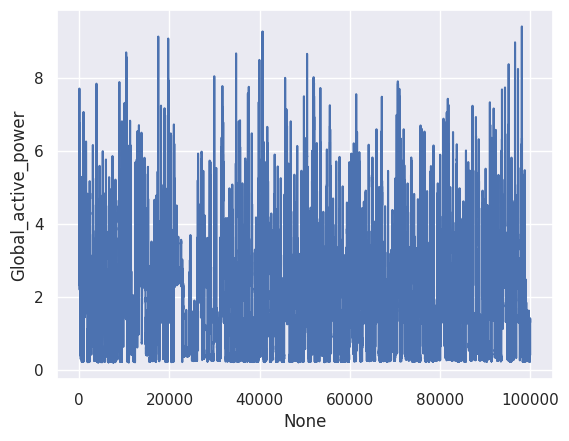

In [5]:
sns.lineplot(X, x=X.index, y="Global_active_power")

In [6]:
spot = SPOT(1e-4)
thresholds, alerts = spot.fit_predict(
    X["Global_active_power"].to_numpy(), num_inits=1000
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99000/99000 [00:35<00:00, 2796.67it/s]


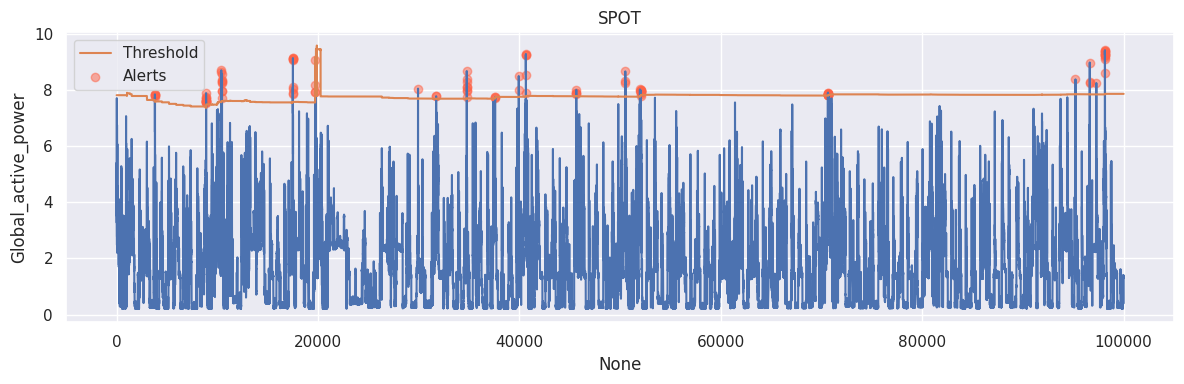

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(X, x=X.index, y="Global_active_power")
ax.plot(X.index, thresholds, label="Threshold")
ax.scatter(
    X.index[alerts],
    X["Global_active_power"].loc[alerts],
    color="tomato",
    alpha=0.5,
    label="Alerts",
)
ax.legend()
ax.set_title("SPOT")
fig.tight_layout()

In [8]:
spot = DSPOT(2 * 24 * 60, 1e-4)
thresholds, alerts = spot.fit_predict(
    X["Global_active_power"].to_numpy(), num_inits=1000
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96120/96120 [00:22<00:00, 4336.68it/s]


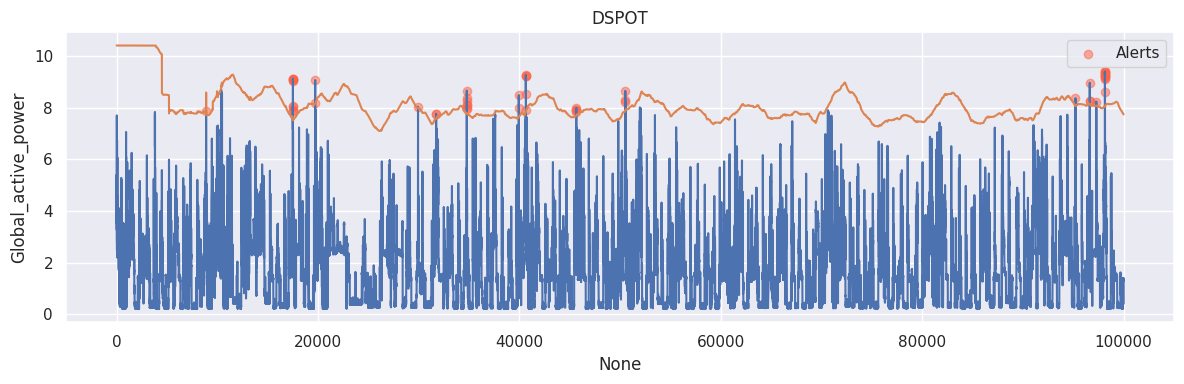

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(X, x=X.index, y="Global_active_power")
ax.plot(X.index, thresholds)
ax.scatter(
    X.index[alerts],
    X["Global_active_power"].loc[alerts],
    color="tomato",
    alpha=0.5,
    label="Alerts",
)
ax.legend()
ax.set_title("DSPOT")
fig.tight_layout()